# Quantified Me Final Project
* Dylan Eck  
* CPSC 222  
* Dr. Sprint

## Introduction

### Goal
For my project, I have downloaded my spotify data between 9/17/2020 and 9/15/2021. I will clean the data, then run tests on the data after visualizing it.

<img src="https://www.macworld.com/wp-content/uploads/2021/03/spotify-logo-100779042-orig-3.jpg" width="400"/>

### Why I Used This Data
I chose to do Spotify data because, first I listen to a lot of music, so there is a lot of data on me. Second, with this data, I think a lot of conclusions could be drawn about what I am doing, how I am feeling, and where I am based off of what I listen to.

### Format
The data from Spotify is read in as a JSON file, and then I convert it to a dataframe, and store numerous series and dataframes based off of this data into CSV files.

### Reading in Data

Before even cleaning the data, I had to read it in. I was given six different json files from spotify, so I had to read them all in seperatly using pd.read_json(), which returned six pandas dataframes. I then had to combine all of the dataframes into one, using the function pd.concat(). I assigned that function to a variable and then returned the variable.

In [1]:
import utils
import pandas as pd

streaming_df = utils.open_json()

print(streaming_df)

                endTime              artistName  \
0      2020-09-17 03:09                 Rihanna   
1      2020-09-17 03:12             James Blake   
2      2020-09-17 03:18            Travis Scott   
3      2020-09-17 03:21  A Boogie Wit da Hoodie   
4      2020-09-17 03:25                JACKBOYS   
...                 ...                     ...   
52672  2021-09-15 15:47           The Kid LAROI   
52673  2021-09-15 15:51                24kGoldn   
52674  2021-09-15 15:52         Chri$tian Gate$   
52675  2021-09-15 15:57            Travis Scott   
52676  2021-09-15 15:59            Lil Uzi Vert   

                                           trackName  msPlayed  
0                                    FourFiveSeconds    107933  
1      Mile High (feat. Travis Scott & Metro Boomin)    193600  
2                            90210 (feat. Kacy Hill)    339066  
3                            Swervin (feat. 6ix9ine)    189486  
4                    WHAT TO DO? (feat. Don Toliver)    250141

### Attribute Descriptions
* endTime: The holds the date and time that I finished listening to a specific song.
    * I want to split these into different attributes so that I can work with both the date and time.
* artistName: Name of the artist.
    * This column will be dropped.
* trackName: Name of the song listened to.
    * This column will be dropped.
* msPlayed: The amount of time that each specific song is played in milliseconds.
    * I will convert this to sPlayed.

### What I Am Trying to Classify
After doing a lot of cleaning, I intend on trying classify whether a day was in 2020 or 2021.

### Impacts
This result can show me how my music listening has changed between 2020 and 2021, and could open up further analysis into my habits in both years.

### Who Would be Interested in the Results
The only people who would really be interested are Spotify and I. This is because I can get a better understanding of myself and Spotify can get a better understanding of one of their clients.

## Data Cleaning

### Cleaning Data pt. 1

Now that the data has been read in, I can now clean it so that I have some of the data that I want for tests. For readability reasons, the first column I want to add is converting the "msPlayed" column into a seconds played column. In order to do this, I must simplily make a series with the "msPlayed" column and then use the divide function with an input of 1000, since thats how many milliseconds are in a second. This will then be returned to a new series and that series will be added to the dataframe as a new column called "sPlayed". I am also going to drop columns that are not going to be useful in our analysis.

In [2]:
streaming_df = utils.ms_to_s(streaming_df)
streaming_df = utils.drop_rows(streaming_df)
utils.pool_time(streaming_df)
print(streaming_df)

Total Seconds: 2789307.435999944 Total minutes: 46488.45726666573 Total hours: 774.8076211110955 Total days: 32.28365087962898
                endTime  msPlayed  sPlayed
0      2020-09-17 03:09    107933  107.933
1      2020-09-17 03:12    193600  193.600
2      2020-09-17 03:18    339066  339.066
3      2020-09-17 03:21    189486  189.486
4      2020-09-17 03:25    250141  250.141
...                 ...       ...      ...
52672  2021-09-15 15:47    195268  195.268
52673  2021-09-15 15:51    220386  220.386
52674  2021-09-15 15:52    112500  112.500
52675  2021-09-15 15:57    243836  243.836
52676  2021-09-15 15:59    140610  140.610

[52677 rows x 3 columns]


### Data Cleaning Pt. 2
The second column I want to add for my testing is a weekday column. In order to make a function that adds this column I must have the dates for each song. As you can see in the data, Spotify gives us an end time column, which includes the time that the song ended, along with the date. Since this cannot be used for the function, the time and date must be seperated. Using the str.split(expand=True) function, I am able to do this by splitting the string at the whitespace between the time and date. By putting expand=True, this makes it return both values to a new dataframe, which I can then assign the columns to columns of the main dataframe.

In [3]:
streaming_df = utils.split_string(streaming_df)

print(streaming_df)

      endTime  msPlayed  sPlayed        date
0       03:09    107933  107.933  2020-09-17
1       03:12    193600  193.600  2020-09-17
2       03:18    339066  339.066  2020-09-17
3       03:21    189486  189.486  2020-09-17
4       03:25    250141  250.141  2020-09-17
...       ...       ...      ...         ...
52672   15:47    195268  195.268  2021-09-15
52673   15:51    220386  220.386  2021-09-15
52674   15:52    112500  112.500  2021-09-15
52675   15:57    243836  243.836  2021-09-15
52676   15:59    140610  140.610  2021-09-15

[52677 rows x 4 columns]


### Data Cleaning Pt. 3

Now that the date and time are seperated, we can now find the weekdays for each song. First, a series is made out of the newly created "dates" column and two empty pandas series are created. Then, the dates must be converted to datetime order using the .to_datetime() function and then stored as one of the blank pandas series. Then, the dates will being converted to weekdays using the .dt.day_name() function with the return value being stored in the other empty pandas series. This series will then be added to the main dataframe with a new column called "Day_of_Week".

In [4]:
streaming_df, new_day_col = utils.add_day_col(streaming_df)

print(streaming_df)

      endTime  msPlayed  sPlayed        date Day_of_Week
0       03:09    107933  107.933  2020-09-17    Thursday
1       03:12    193600  193.600  2020-09-17    Thursday
2       03:18    339066  339.066  2020-09-17    Thursday
3       03:21    189486  189.486  2020-09-17    Thursday
4       03:25    250141  250.141  2020-09-17    Thursday
...       ...       ...      ...         ...         ...
52672   15:47    195268  195.268  2021-09-15   Wednesday
52673   15:51    220386  220.386  2021-09-15   Wednesday
52674   15:52    112500  112.500  2021-09-15   Wednesday
52675   15:57    243836  243.836  2021-09-15   Wednesday
52676   15:59    140610  140.610  2021-09-15   Wednesday

[52677 rows x 5 columns]


### Data Cleaning pt. 4
Next, I want to add a column that signifies wherether each day is a weekday or a weekend. This is done by making a seperate series with just the "Day_of_Week" column, and then using a for loop and if statements, filling out a new empty pandas series with "Weekday" or "Weekend," as appropriate. This series will then be added to the main dataframe as the "weekday" column.

In [5]:
week_ser, day_ser, weekend_ser, weekday_ser, streaming_df, time_ser = utils.aggregate_data(streaming_df)

print(streaming_df)

      endTime  msPlayed  sPlayed        date Day_of_Week Weekdays
0       03:09    107933  107.933  2020-09-17    Thursday  Weekday
1       03:12    193600  193.600  2020-09-17    Thursday  Weekday
2       03:18    339066  339.066  2020-09-17    Thursday  Weekday
3       03:21    189486  189.486  2020-09-17    Thursday  Weekday
4       03:25    250141  250.141  2020-09-17    Thursday  Weekday
...       ...       ...      ...         ...         ...      ...
52672   15:47    195268  195.268  2021-09-15   Wednesday  Weekday
52673   15:51    220386  220.386  2021-09-15   Wednesday  Weekday
52674   15:52    112500  112.500  2021-09-15   Wednesday  Weekday
52675   15:57    243836  243.836  2021-09-15   Wednesday  Weekday
52676   15:59    140610  140.610  2021-09-15   Wednesday  Weekday

[52677 rows x 6 columns]


### Data Cleaning Pt. 5
Now I want to make it so that there is only 1 row per day, not 1 row for every song that I have listened to. So I created a function that uses the .groupby function to group each instance by the same value, in this case dates. This would then return a new dataframe. Along with this, I grouped data by weekends and weekdays, which were previously added to the main dataframe. This function also worked to seperate the weekdays and weekends into two different dataframes after all of the data for each day was aggrigated into one row. I will then manually fill in dates that I did not listen to music with "0" in sPlayed and necessary values for other columns so that dependant t-test can be preformed. I will then add columns with the month, year, and wherether it is a hot month or a cold month(1 = yes, 0 = no). Along with this, data for each weekday will be aggrigated. I will also make seperate dataframes for each weekday and then weekdays and weekends as a whole.

In [6]:
days_df = utils.pool_by_day(streaming_df, "day.csv")
days_df = utils.seperate_dates(days_df)
days_df = utils.make_warm_cold(days_df)
days_df = utils.clean_months(days_df)
week_df, wend_df, monday_df, tuesday_df, wednesday_df, thursday_df, friday_df, saturday_df, sunday_df = utils.make_sep_df(days_df)

           date  msPlayed    sPlayed Day_of_Week Weekdays  year  month  heat
0    2020-09-17   8673232   8673.232    Thursday  Weekday  2020      9     1
1    2020-09-18  10823254  10823.254      Friday  Weekday  2020      9     1
2    2020-09-19   8206771   8206.771    Saturday  Weekend  2020      9     1
3    2020-09-20   6578224   6578.224      Sunday  Weekend  2020      9     1
4    2020-09-21  12646517  12646.517      Monday  Weekday  2020      9     1
..          ...       ...        ...         ...      ...   ...    ...   ...
359  2021-09-11   3057668   3057.668    Saturday  Weekend  2021      9     1
360  2021-09-12         0      0.000      Sunday  Weekend  2021      9     1
361  2021-09-13  10589637  10589.637      Monday  Weekday  2021      9     1
362  2021-09-14   6207483   6207.483     Tuesday  Weekday  2021      9     1
363  2021-09-15   6519708   6519.708   Wednesday  Weekday  2021      9     1

[364 rows x 8 columns]


### Data Cleaning Pt. 6
Along with the day of week, I wanted to look at how the time of the day affected how much music I listened to in total. In order to do this, I ran a for loop with if statements that gave out designations from 1-6 based on the time. Then I split each of the values with the same indicator into different dataframes.

In [7]:
streaming_df = utils.seperate_time_data(streaming_df)

one_ser, two_ser, three_ser, four_ser, five_ser, six_ser, section_ser, day_ser_2 = utils.split_time(streaming_df)

### Challenges with Data Preperation
The biggest challenge with data preperation was the fact that I was not given all that much data. This forced me to do a lot of cleaning and aggrigation, trying to find a pattern. This caused data cleaning to be the largest part of my project.

## Visualizations

### Weekday Data Visualization

After adding the date column, I was curious to see if the was a difference in how much music I listen to each day. So I made 3 different data visualizations. The first one compares the total amount of music listened to by each weekday. The second one shows that amount of total music I listened to on weekdays versus weekends, with the data normalized to being the average per day of the week. (Total amount listened to on weekdays divided by 5 and weekends divided by 2). The last one is the total amount of seconds I listened to music for each day in the dataset.

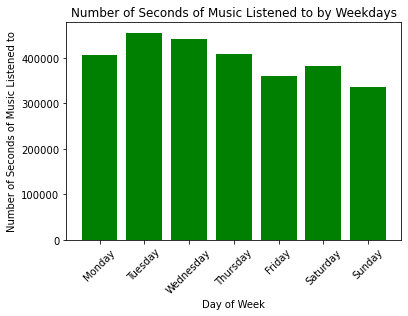

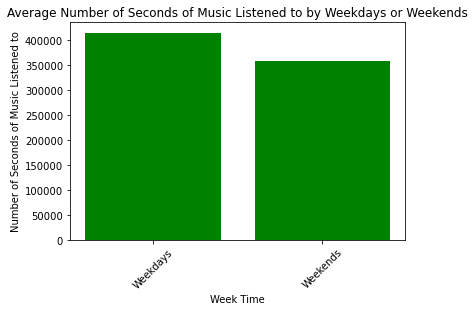

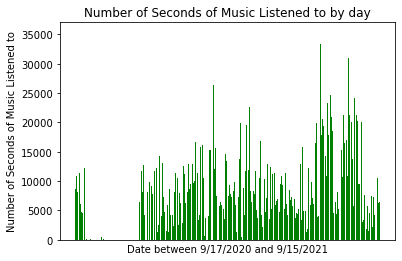

In [8]:
utils.make_chart(week_ser, day_ser)
utils.make_chart_2(weekend_ser)
utils.make_chart_3(days_df)

### Visualization Analysis
In the first visual, Tuesday appears to have the most music listened to. My guess would be because I often listen to music while doing howework, and Tuesday it usually a heavy homework day for me. In the second visual, it appears that I listen to more music on the average weekday rather than weekend. My guess would be that this is caused by homework again. In the final visual, there is a large gap in the October-November 2020 section. My guess is that this is an issue with Spotify, because I doubt I went a whole month without listening to music. Also, Summer 2021 seems like the time where I listened to music the most. This is because I would often listen to music during my Summer job, which was full-time.

### Time Data Visualization
After seperating the total amount of music I listened to into 6 different data frames, I was curious to see this data visually. The visualization shows the total amount of seconds of music listened to in each 4 hour section throughout all of the days.

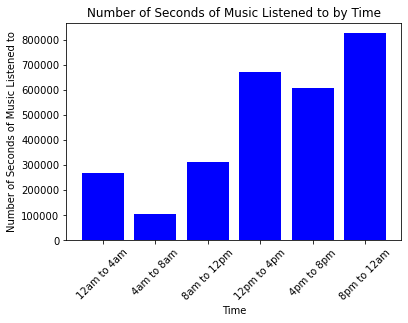

In [9]:
utils.make_chart_4(section_ser, day_ser_2)

### Visualization Analysis
From this visual, it appears that I listen to a lot more music in the PM than the AM. this makes sense, as I am asleep for much of the AM.

### T-test #1

The first t-test I am going to run on the data is a set of t-tests related to the seconds of music listened to by weekday. To get a general feel for the data, I am going to run 3 concurrent t-tests, running a Tuesday vs Saturday, Monday vs Friday, and and Wednesday vs Sunday. For each test I will be seeing if there is a difference in the daily minutes listened by weekday, and I will set $\alpha = .05$.

#### Step 1: Identify the null and alternative hypothesis
- The null hyphothesis is the "status quo" and the alternative is the potential result if the null is rejected
- Null Hypothesis 1 (H0) - $Tuesday = Saturday$
- Alternative Hypothesis 1 (H1) - $Tuesday \ne Saturday$

- Null Hypothesis 2 (H0) - $Monday = Friday$
- Alternative Hypothesis 2 (H1) - $Monday \ne Friday$

- Null Hypothesis 3 (H0) - $Wednesday = Sunday$
- Alternative Hypothesis 3 (H1) - $Wednesday \ne Sunday$

#### 2. Level of Significance ($\alpha$)
- This is the level of certainty that we are avoiding a type 1 error (Rejecting the null when it is actually true)
- We have decided that $\alpha = .05$
- That means there is a 5% chance of a type 1 error

#### 3. Select Appropriate test stat
- This is the equation we're going to use to calculate the t-value.
- Since we are doing a 2 sample, 2 tailed t-test with independent samples, it will be calculated using the equation: $t = \frac{\overline{d}- \mu_d}{s_d}$`

#### 4. Decision Rule: Critical Value
- This where we decide that at what critical value we will reject of fail to reject null hypothesis
- $\alpha = .05$
- 2-tailed t-test
- 1.96
- Due to the high number of values for each test we will go with df = infinity
- Therefore, if $t-computed < -1.96$ or $t-computed > 1.96$, then we  reject the null hypothesis, if $t-computed > -1.96$ and $t-computed < 1.96$, then we fail to reject the null.

#### 5. Make decision
- This is where the decision is made.
- t-computed is calculated below using python:

In [10]:
utils.days_ttest(monday_df, tuesday_df, wednesday_df, friday_df, saturday_df, sunday_df)

t for Tuesday vs Saturday: 1.3724400321934167 p: 0.1759325038115618
t for Monday vs Friday: 0.9477845077085488 p: 0.34770865937079587
t for Wednesday vs Sunday: 1.9023964506082696 p: 0.06277320647571659


### Conclusion
Based off of the t values for each test, we fail to reject the null hypothesis as $\alpha = .05$. There appears to not be a difference in the amount of music I listen to in the compared days.

### T-test #2
I assigned the days in the previous test intentionally in order to see if there was a difference between the amount of music I listen to on an average weekday versus weekend day. We will run the test to see if there is a difference, and we will use $\alpha = .05$.

## Step 1: Identify the null and alternative hypothesis
- The null hyphothesis is the "status quo" and the alternative is the potential result if the null is rejected
- Null Hypothesis (H0) - $Weekdays = Weekends$
- Alternative Hypothesis (H1) - $Weekdays \ne Weekends$

#### 2. Level of Significance ($\alpha$)
- This is the level of certainty that we are avoiding a type 1 error (Rejecting the null when it is actually true)
- We have decided that $\alpha = .05$
- That means there is a 5% chance of a type 1 error

#### 3. Select Appropriate test stat
- This is the equation we're going to use to calculate the t-value.
- Since we are doing a 2 sample, 2 tailed t-test with independent samples, it will be calculated using the equation: $t = \frac{\overline{d}- \mu_d}{s_d}$`

#### 4. Decision Rule: Critical Value
- This where we decide that at what critical value we will reject of fail to reject null hypothesis
- $\alpha = .05$
- 2-tailed t-test
- 1.96
- Due to the high number of values for each test we will go with df = infinity
- Therefore, if $t-computed < -1.96$ or $t-computed > 1.96$, then we  reject the null hypothesis, if $t-computed > -1.96$ and $t-computed < 1.96$, then we fail to reject the null.

#### 5. Make decision
- This is where the decision is made.
- t-computed is calculated below using python:

In [11]:
utils.weekday_ttest(week_df, wend_df)

t: 1.3866515045959888 p: 0.1664013771631589


### Conclusion
Based off of the t value, we fail to reject the null hypothesis as $\alpha = .05$. There appears to not be a difference between the amount of music I listen to on weekdays versus weekends.

### T-test #3
For this t-test, I am going to have another series of t-tests, comparing the AM and PM time counterparts. We will run the test to see if there is a difference, and we will use $\alpha = .05$.

#### Step 1: Identify the null and alternative hypothesis
- The null hyphothesis is the "status quo" and the alternative is the potential result if the null is rejected
- Null Hypothesis 1 (H0) - $12am = 12pm$
- Alternative Hypothesis 1 (H1) - $12am \ne 12pm$

- Null Hypothesis 2 (H0) - $4am = 4pm$
- Alternative Hypothesis 2 (H1) - $4am \ne 4pm$

- Null Hypothesis 3 (H0) - $8am = 8pm$
- Alternative Hypothesis 3 (H1) - $8am \ne 8pm$

#### 2. Level of Significance ($\alpha$)
- This is the level of certainty that we are avoiding a type 1 error (Rejecting the null when it is actually true)
- We have decided that $\alpha = .05$
- That means there is a 5% chance of a type 1 error

#### 3. Select Appropriate test stat
- This is the equation we're going to use to calculate the t-value.
- Since we are doing a 2 sample, 2 tailed t-test with independent samples, it will be calculated using the equation: $t = \frac{\overline{d}- \mu_d}{s_d}$`

#### 4. Decision Rule: Critical Value
- This where we decide that at what critical value we will reject of fail to reject null hypothesis
- $\alpha = .05$
- 2-tailed t-test
- 1.96
- Due to the high number of values for each test we will go with df = infinity
- Therefore, if $t-computed < -1.96$ or $t-computed > 1.96$, then we  reject the null hypothesis, if $t-computed > -1.96$ and $t-computed < 1.96$, then we fail to reject the null.

#### 5. Make decision
- This is where the decision is made.
- t-computed is calculated below using python:

In [12]:
utils.time_ttest(one_ser, two_ser, three_ser, four_ser, five_ser, six_ser)

t for 12-4: -4.597586083313764 p: 6.175728590895111e-06
t for 4-8: -1.929051941892462 p: 0.054589565454335284
t for 8-12: 0.019462052800331378 p: 0.984484451409492


### Conclusion
Based off of the t values, we fail to reject the null hypotheses for 4-8 and 8-12 at $\alpha = .05$. There appears to not be a difference between the amount of music I listen to in the different am and pm times. For 12-4, we do reject the null at $\alpha = .05$, so there appears to be a difference in the amount of seconds of music listened to.

## Classification

### What We're Trying to Predict
We are going to try to classify if the instance we're are looking at is in 2020 or 2021. The classifiers will be evaluated on accuracy.

### Hypothesis
My hypothesis is that based on the data I have, there are not super strong correlations, so I do not think the accuracy of the classifiers will be all that great.

### Correlation Matrix
To get a sense for how well values are correlated to each other, I am going to run a correlation matrix. I will also convert the days of the week to numeric on a 1-7 scale and then convert years and weekdays to 1 or 0.

In [13]:
rest_df  = days_df.drop(columns=["msPlayed", "date"])
rest_df = utils.convert_numeric(rest_df)
corr_df = rest_df.corr()
corr_df.style.background_gradient(cmap='bwr').set_precision(2)

,sPlayed,Day_of_Week,Weekdays,year,month,heat
sPlayed,1.00,-0.09,-0.07,0.46,-0.26,0.34
Day_of_Week,-0.09,1.00,0.79,0.00,-0.01,0.00
Weekdays,-0.07,0.79,1.00,0.00,-0.01,0.00
year,0.46,0.00,0.00,1.00,-0.78,0.47
month,-0.26,-0.01,-0.01,-0.78,1.00,-0.01
heat,0.34,0.00,0.00,0.47,-0.01,1.00


As you can see, ther is not a whole lot of correlation between anything. The one that stands out is that there is a moderate correlation between the year and seconds played, so I will attempt to make a classifier that predicts which year that set of data is in.

### kNN Classifier
I will now run a kNN classifier to try to figure out which year each set of data is in. I will drop the msPlayed, date, weekdays, and year columns for my x value, and I will reserve 75% of my data for training and 25% for testing. I will start out by having k = 4.

In [14]:
utils.kNN_class(days_ser, 4)

NameError: name 'days_ser' is not defined

As you can see, this classifier is very accurate, however, only $\frac{106}{364}$ of my points are in 2020, so if someone guessed 2021 for all of my points, they would still have an accuracy of about 71%. Let's see if changing the k-value can imporve the classifier.

#### k = 3

In [ ]:
utils.kNN_class(days_ser, 3)

#### k = 5

In [ ]:
utils.kNN_class(days_ser, 5)

#### k = 6

In [ ]:
utils.kNN_class(days_ser, 6)

It appears that the classifier is most accurate when k = 5. The is an incredibly high accuracy, however I want to see if we can improve the algorithm even more by using a decision tree classifier.

### Decision Tree Classifier

I will now run the decision tree classifier with the same splits as kNN, and a random state of 0 for reproducability. I will also show the decision tree.

In [ ]:
utils.tree_classifier(days_ser)

The decision tree classifier gives the same accuracy as the kNN classifier with k = 5, which tells me that this is the best accuracy that we can achieve. 

### Problems with Classification
The biggest problem I ran into with classification was that the only true numberic value the Spotify gives is the msPlayed column. I then coverted this to sPlayed, but that obviously would't effect classifier results. By changing some of the catagorical data to numeric, I was able to give the classifiers more data to work with.

### Conclusion
The accuracy of both classifiers surprised me, and therefore my hypothesis was false. Both classifiers were excellent at finding whether the year was 2020 or 2021.

## Conclusion

### Descripition of Data
At the end, in addition to my original attributes, I also added:
* sPlayed: Amount of seconds of music played per day.
* Day_of_Week: The day of the week.
* Weekday: Whether the day was a weekday or weekend.
* year: Whether the day was was in 2020 or 2021.
* month: What month the day was in.
* heat: Whether or not the day was in a hot month (I classified hot months as April-September).

### Classifiers
I decided to use both the kNN classifier and the Decision Tree classifier. Based off of my evaluation of accuracy, both classifiers preformed well.

### Impacts
A potential impact this could have is the typical breach in privacy that comes with processing this much data. If a company implements similar things on their clients (they do just more complicated), they can find out a lot of personal things about someone. For me, the impact is just that I don't have much privacy and I can also investigate the data to learn more about myself and some things that I do without even realizing.